![alt text](./img/header.png)

# Exercise B: Calculation of Density Slopes and Fluid Density

The purpose of this exercise is to familiarize course participants with the equations for calculating density, density slopes, heads and pressures.  These are important calculations when setting up a variable-density numerical model.   

In [1]:
# %load nbsetup.py
%matplotlib inline
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

## Density Slopes

An empirical relation between the density of saltwater and concentration based on [Baxter and Wallace (1916)](http://pubs.acs.org/doi/abs/10.1021/ja02258a010) is defined as

$\rho = \rho_f + \frac{\partial \rho}{\partial C} (C - C_f)$

where $\rho$ is fluid density [ML$^{-3}$], $\rho_f$ the density of freshwater [ML$^{-3}$], $C$ is the concentration of the fluid, and $C_f$ is the concentration of the constituent(s) in freshwater.

------------------

### Exercise 1

Assuming $\rho_f$ = 1000 kg/m$^3$ and $\rho_s$ = 1025 kg/m$^3$ fill in the following table

|                                   |  Cf  |  Cs  | $\Delta \rho_{max}$  |  $\Delta C_{max}$  |  Density Slope  |
|-----------------------------------|:----:|:----:|:--------------------:|:------------------:|:---------------:|
| TDS in kg/m3                      |  0   | 35   |                   25 | 35                 | 0.7143          |
| TDS in lbs/ft3                    |  0 | 2.185    |  25    |   2.185                   |               11.4416            |
| TDS in g/l                        |   0   |  35    |      25                |                35    |    0.7143             |
| TDS in mg/l                       |   0   |  35000    |    25                  |              35000      |  0.0007143               |
| Normalized TDS concentration      |   0   |   1   |      25                |                  1  |      25           |
| Chloride in kg/m3                 |   0   |  19    |     25                 |                19    |    1.3158             |
| Chloride in lbs/ft3               |   0   |  1.1861    |   25                   |            1.1861        |   21.077              |
| Chloride in g/l                   |   0   |  19    |  25                    |                19    |      1.3158           |
| Chloride in mg/l                  |   0   |  19000    |  25                    |              19000      |    0.0013157             |
| Normalized Chloride concentration |   0   |  1    |     25                 |                  1  |        25         |

---------------

### Exercise 2

Assuming $\rho_f$ = 62.44 lbs/ft$^3$ and $\rho_s$ = 64.001 lbs/m$^3$ fill in the following table


|                                   |  Cf  |  Cs  | $\Delta \rho_{max}$  |  $\Delta C_{max}$  |  Density Slope  |
|-----------------------------------|:----:|:----:|:--------------------:|:------------------:|:---------------:|
| TDS in kg/m3                      |   0   |  35    |       1.561               |               35     |      0.0446           |
| TDS in lbs/ft3                    |   0   |  2.185    |       1.561               |           2.185         |     0.7144            |
| TDS in g/l                        |   0   |   35   |       1.561               |               35     |        0.0446         |
| TDS in mg/l                       |   0   |   35000   |    1.561                  |           35000         |   0.000446              |
| Normalized TDS concentration      |   0   |   1   |        1.561              |               1     |      1.561           |
| Chloride in kg/m3                 |   0   |   19   |      1.561                |               19     |     0.08216            |
| Chloride in lbs/ft3               |   0   |   1.1861   |     1.561                 |           1.1861         |   1.3161              |
| Chloride in g/l                   |   0   |   19   |      1.561                |               19     |      0.08216           |
| Chloride in mg/l                  |   0   |   19000   |       1.561               |           19000         |      0.00008216           |
| Normalized Chloride concentration |   0   |   1   |         1.561             |               1     |     1.561            |

-------------

The linear relation between fluid concentration and density can be extended to include the contribution of multiple species and temperature. The extended fluid concentration fluid density relation is

$\rho = \rho_f + \sum_{k=1}^{NS} \frac{\partial \rho}{\partial C} (C - C_f) + \frac{\partial \rho}{\partial T} (T - T_0)$,

where $NS$ is the number of simulated species, $T$ is the fluid temperature, and $T_0$ is a reference temperature.

--------------

### Exercise 3

Assuming the density of freshwater is 1000 kg/m$^3$ at 4$^{\circ}$ C and 998.2 kg/m$^3$ at 20$^{\circ}$ C what is $\frac{\partial \rho}{\partial T}$?

In [2]:
(1000 - 998.2) / (4 - 20)

-0.11249999999999716

--------

The relation between temperature and density is non-linear between 0 and 100$^{\circ}$ and is shown below.

[   0.     4.     4.4   10.    15.6   21.    26.7   32.2   37.8   48.9
   60.    71.1   82.2   93.3  100. ]
[  999.87  1000.     999.99   999.75   999.07   998.02   996.69   995.1
   993.18   988.7    983.38   977.29   970.56   963.33   958.65]


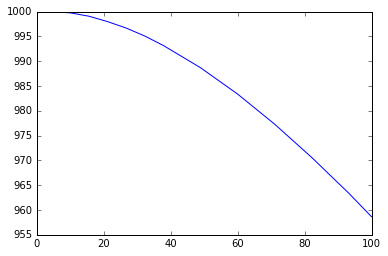

In [3]:
fn = os.path.join('data', 'Trhorelation.txt')
trho = np.genfromtxt(fn, names=['temp', 'rho'])
plt.plot(trho['temp'], trho['rho'])
print(trho['temp'])
print(trho['rho'])

---------

### Exercise 4

Use the data above to calculate $\frac{\partial \rho}{\partial T}$ between 10 and 32.2$^{\circ}$ C. 

In [4]:
(999.75 - 995.1) / (10 - 32.2)

-0.2094594594594584

## Calculation of Fluid Density

Calculate the density of the samples shown below using the density slopes that you calculated earlier.

### Exercise 5

**Sample 1:** TDS = 10,000 mg/l

In [5]:
1000. + 0.0007143 * 10000

1007.143

**Sample 2:** TDS = 35,000 mg/l

In [6]:
1000. + 0.0007143 * 35000

1025.0005

**Sample 3:** Chloride concentration = 5,000 mg/l

In [7]:
1000 + 0.0013157 * 5000

1006.5785

**Sample 4:** Relative Chloride concentration = 0.5

In [8]:
1000 + 25 * .5

1012.5

**Sample 5:** Chloride concentration = 19,000 mg/l

In [9]:
1000 + 0.0013157 * 19000

1024.9983

**Sample 6:** Chloride concentration = 200 mg/l and TDS = 2000 mg/l (which concentration would provide a better estimate of density)

In [10]:
1000 + 0.0013157 * 200

1000.26314

In [11]:
1000 + 0.0007143 * 2000

1001.4286

**Sample 7:** Chloride concentration = 19,000 mg/l with a freshwater density of 999.75 kg/m$^3$ at 10$^{\circ}$ C.

In [12]:
999.75 + 0.0013157 * 19000

1024.7483

**Sample 8:** Chloride concentration = 19,000 mg/l at 21$^{\circ}$ C assuming a $\frac{\partial \rho}{\partial T}$ of -0.375, a reference temperature ($T0$) of 10$^{\circ}$ C, and freshwater density of 999.75 kg/m$^3$ at 10$^{\circ}$ C.

In [13]:
999.75 + 0.0013157 * 19000 - 0.375 * (21 - 10)

1020.6233